In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('..') 
from src.shared.utils import TrainingConfig

# Load the saved action data
config = TrainingConfig()
actions_path = os.path.join(os.path.dirname(config.bck_model_path), 'all_actions_distribution_stage_2_6.npy')
all_actions = np.load(actions_path)

print(f"Loaded {all_actions.shape[0]} actions.")
accelerations = all_actions[:, 0]
steering_angles = all_actions[:, 1]

2025-08-04 08:48:26.614587: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754322506.624409   49504 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754322506.627130   49504 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754322506.635468   49504 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754322506.635487   49504 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754322506.635489   49504 computation_placer.cc:177] computation placer alr

Loaded 8701037 actions.


In [8]:
# --- Analyze the Distribution ---
print("\n--- Basic Statistics ---")
print(f"Acceleration | Mean: {np.mean(accelerations):.3f}, Std: {np.std(accelerations):.3f}")
print(f"             | Min: {np.min(accelerations):.3f}, Max: {np.max(accelerations):.3f}")
print(f"Steering     | Mean: {np.mean(steering_angles):.3f}, Std: {np.std(steering_angles):.3f}")
print(f"             | Min: {np.min(steering_angles):.3f}, Max: {np.max(steering_angles):.3f}")


--- Basic Statistics ---
Acceleration | Mean: 0.047, Std: 0.890
             | Min: -10.000, Max: 7.998
Steering     | Mean: 0.001, Std: 0.098
             | Min: -0.800, Max: 0.800


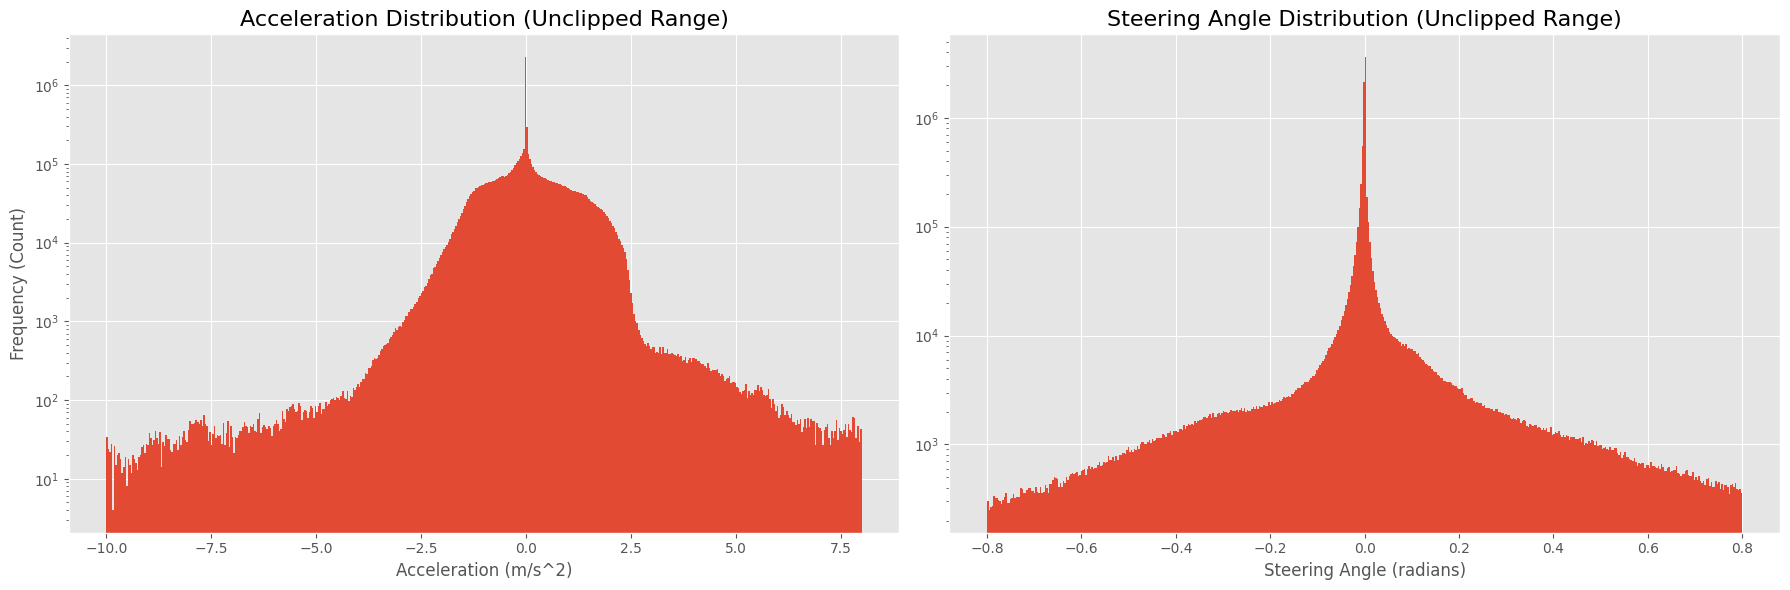

In [9]:
# --- Plot Histograms ---
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Acceleration Histogram
# We use a large number of bins and a smaller range to see the central distribution
axes[0].hist(accelerations, bins=500)
axes[0].set_title('Acceleration Distribution (Unclipped Range)', fontsize=16)
axes[0].set_xlabel('Acceleration (m/s^2)')
axes[0].set_ylabel('Frequency (Count)')
axes[0].set_yscale('log') # Use a log scale to see the rare events!

# Plot Steering Angle Histogram
axes[1].hist(steering_angles, bins=500)
axes[1].set_title('Steering Angle Distribution (Unclipped Range)', fontsize=16)
axes[1].set_xlabel('Steering Angle (radians)')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

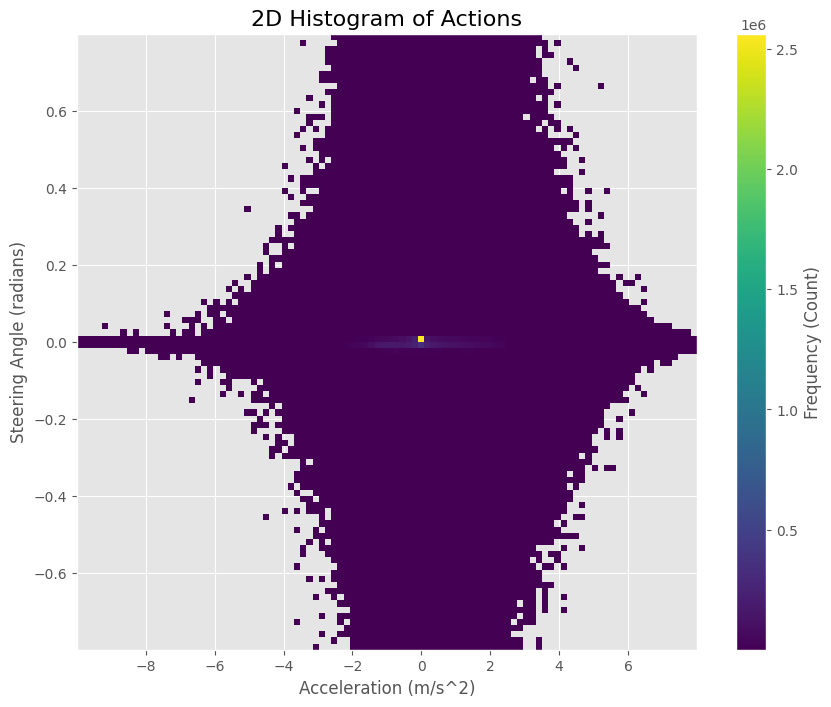

In [10]:

# --- 2D Histogram (Heatmap) ---
plt.figure(figsize=(10, 8))
# Create a 2D histogram
plt.hist2d(accelerations, steering_angles, bins=(100, 100), cmin=1)
plt.colorbar(label='Frequency (Count)')
plt.title('2D Histogram of Actions', fontsize=16)
plt.xlabel('Acceleration (m/s^2)')
plt.ylabel('Steering Angle (radians)')
plt.show()